# Load dataset

https://www.kaggle.com/adityakadiwal/water-potability

In [1]:
import pandas as pd

water_quality = pd.read_csv("datasets/water_quality/water_potability.csv")

In [2]:
water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


## Checking for NA's

In [3]:
water_quality["Sulfate"].isna().sum()

781

In [4]:
water_quality.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
water_quality.dropna().count()

ph                 2011
Hardness           2011
Solids             2011
Chloramines        2011
Sulfate            2011
Conductivity       2011
Organic_carbon     2011
Trihalomethanes    2011
Turbidity          2011
Potability         2011
dtype: int64

### Multiple imputation using MICE

In [6]:
# tensorflow 2.5.0 requires numpy~=1.19.2, but you have numpy 1.21.1 which is incompatible.
# fancyimpute 0.6.0 requires numpy==1.19.5, but you have numpy 1.21.1 which is incompatible.

In [7]:
from fancyimpute import IterativeImputer as MICE
trans = MICE(verbose=False)
fitted = trans.fit(water_quality)
trans = fitted.transform(water_quality)

In [12]:
water_quality_MICE = pd.DataFrame(trans)
water_quality_MICE

,0,1,2,3,4,5,6,7,8,9
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


In [9]:
water_quality.loc[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [16]:
water_quality_MICE.loc[water_quality_MICE.isna().any(axis = 1)]

,0,1,2,3,4,5,6,7,8,9


In [11]:
water_quality[water_quality.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [24]:
water_quality_MICE.columns = water_quality.columns
water_quality_MICE

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.190793,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,344.837035,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,331.983224,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
3272,7.808856,193.553212,17329.802160,8.061362,338.609814,392.449580,19.903225,66.474992,2.798243,1.0
3273,9.419510,175.762646,33155.578218,7.350233,326.847002,432.044783,11.039070,69.845400,3.298875,1.0
3274,5.126763,230.603758,11983.869376,6.303357,336.992285,402.883113,11.168946,77.488213,4.708658,1.0


## Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

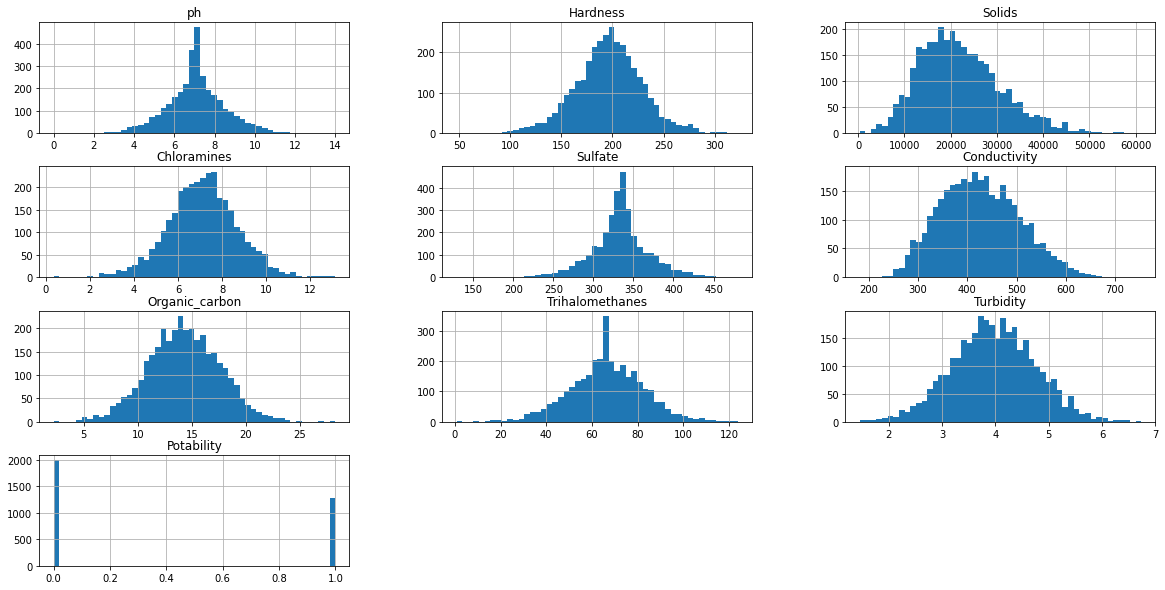

In [27]:
import matplotlib.pyplot as plt
water_quality_MICE.hist(bins = 50, figsize = (20, 10))
plt.show

Overall the data looks quite normally distributed. Solids may be slightly left skewed but still relatively normally distributed. The distribution of potability indicated an unbalanced dataset which may bias the model. 

## Splitting datasets into test and train set

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2)
for train_index, test_index in split.split(water_quality_MICE, water_quality_MICE["Potability"]):
    strat_train_set = water_quality_MICE.loc[train_index]
    strat_test_set = water_quality_MICE.loc[test_index]

In [32]:
strat_test_set["Potability"].value_counts()/len(strat_test_set)

0.0    0.609756
1.0    0.390244
Name: Potability, dtype: float64

In [33]:
strat_train_set["Potability"].value_counts()/len(strat_train_set)

0.0    0.609924
1.0    0.390076
Name: Potability, dtype: float64

In [34]:
water_quality_MICE["Potability"].value_counts()/len(water_quality_MICE)

0.0    0.60989
1.0    0.39011
Name: Potability, dtype: float64

## Correlation matrix

In [39]:
cor_mat = water_quality_MICE.corr()
cor_mat["Potability"].sort_values(ascending = False)

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006930
Turbidity          0.001581
ph                -0.004295
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020482
Organic_carbon    -0.030001
Name: Potability, dtype: float64

## Data Prep for ML

In [40]:
# predictors
water_quality_prep = strat_test_set.drop("Potability", axis = 1)
# explanatory
water_quality_labels = strat_train_set["Potability"].copy

In [49]:
# need to scale data. Create pipeline first

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandarScaler
from fancyimpute import IterativeImputer as MICE

pipeline = Pipeline([
    ("iterative_imputer", MICE()),
    ("std_scaler", StandardScaler())
])

water_quality_no_labels = water_quality.drop("Potability", 
                                             axis = 1)

water_quality_tr = pipeline.fit_transform(water_quality_no_labels)


ImportError: cannot import name 'StandarScaler' from 'sklearn.preprocessing' (/Users/lloydhamilton/Documents/GitHub.nosync/tensorflow_oreily/tensorflow_env/lib/python3.9/site-packages/sklearn/preprocessing/__init__.py)